<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/2_Exam_1b_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DND Exam 1

## Name:
## Neptun:

In [ ]:
# @title
# DO NOT MODIFY

from PIL import Image
from io import BytesIO
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

# Architecture

Your task is to implement the following architecture

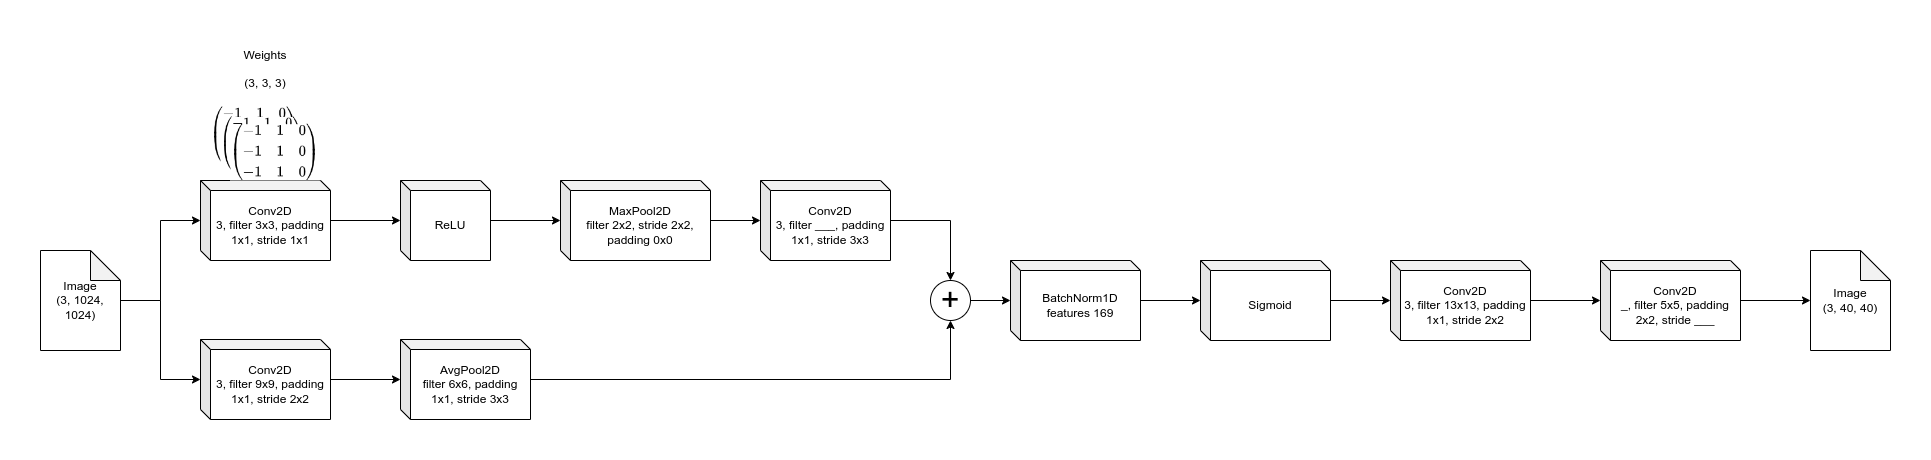

In [ ]:
first_weight = np.array([[-1, 1, 0],
                         [-1, 1, 0],
                         [-1, 1, 0]])
first_weight = np.stack((first_weight, first_weight, first_weight))
first_weight = torch.Tensor(first_weight)

first_weight=first_weight.unsqueeze(0)
first_weight=first_weight.repeat(3,1,1,1)
print(first_weight.shape)



class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1=nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1)

        self.conv1.weight = nn.Parameter(first_weight)

        # self.conv1.bias = nn.Parameter(torch.Tensor([0]))
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2=nn.Conv2d(3, 3, kernel_size=9, stride=3, padding=1) #kernel change
        self.conv3=nn.Conv2d(3, 3, kernel_size=9, stride=2, padding=1)
        self.avgpool=nn.AvgPool2d(kernel_size=6, stride=3, padding=1)
        self.batchnorm=nn.BatchNorm1d(169)
        self.sigmoid=nn.Sigmoid()
        self.conv4=nn.Conv2d(3, 3, kernel_size=13, stride=2, padding=1)
        self.conv5=nn.Conv2d(3, 3, kernel_size=5, stride=2, padding=2) #stride change

        # YOUR IMPLEMENTATION GOES HERE



    def forward(self, image):
        print(f"Input: {image.shape}")

        # YOUR IMPLEMENTATION GOES HERE
        x1= self.conv1(image)
        print(f"After conv1: {x1.shape}")
        x1=self.relu(x1)
        x1=self.pool(x1)
        print(f"After pool: {x1.shape}")
        x1=self.conv2(x1)
        print(f"After conv2: {x1.shape}")
        x2=self.conv3(image)
        print(f"After conv3: {x2.shape}")
        x2=self.avgpool(x2)
        print(f"After avgpool: {x2.shape}")

        x=x1+x2
        print(f"After sum: {x.shape}")
        # reshaping for batchnorm1d

        x= x.squeeze(0)

        print(f"After reshaping: {x.shape}")


        x=self.batchnorm(x)
        print(f"After batchnorm: {x.shape}")
        # x=x.unsqueeze(0).unsqueeze(1)
        # x=x.view(1,3,)


        x=self.sigmoid(x)
        print(f"After sigmoid: {x.shape}")
        x=x.unsqueeze(0)
        print(f"After unsqueeze: {x.shape}")


        x=self.conv4(x)
        print(f"After conv4: {x.shape}")
        x=self.conv5(x)
        print(f"After conv5: {x.shape}")




        return x





        # return image.permute(1, 2, 0)


# DO NOT MODIFY
# SHOWING YOUR RESULT
model=CustomModel()
img=torch.rand(1,3,1024,1024)

mod=model(img)
print(f"Final output: {mod.shape}")

# with torch.no_grad():
#     model = CustomModel()
#     modified = model(image)

#     plt.figure()
#     plt.imshow(modified)

torch.Size([3, 3, 3, 3])
Input: torch.Size([1, 3, 1024, 1024])
After conv1: torch.Size([1, 3, 1024, 1024])
After pool: torch.Size([1, 3, 512, 512])
After conv2: torch.Size([1, 3, 169, 169])
After conv3: torch.Size([1, 3, 509, 509])
After avgpool: torch.Size([1, 3, 169, 169])
After sum: torch.Size([1, 3, 169, 169])
After reshaping: torch.Size([3, 169, 169])
After batchnorm: torch.Size([3, 169, 169])
After sigmoid: torch.Size([3, 169, 169])
After unsqueeze: torch.Size([1, 3, 169, 169])
After conv4: torch.Size([1, 3, 80, 80])
After conv5: torch.Size([1, 3, 40, 40])
Final output: torch.Size([1, 3, 40, 40])
